In [ ]:
# The libraries used in processing the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn as ib
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [ ]:
pip install hpelm

In [ ]:
from hpelm import ELM

In [ ]:
# The dataframe is read from the csv file - healthcare-dataset-stroke-data.csv - taken from kaggle
df = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")

In [ ]:
# The first 5 instances of the dataframe
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


<Axes: >

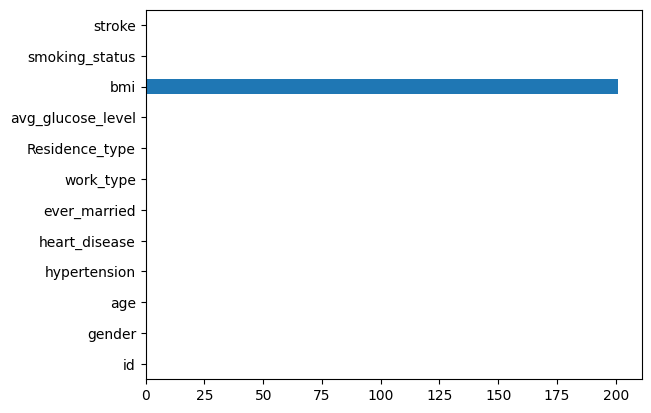

In [ ]:
# Printing the number of N/A values in eacg column
print(df.isna().sum())
# Graphical representation of the na values present in the attribute - bar graph
df.isna().sum().plot.barh()

In [ ]:
# The 'id' column is dropped since the attribute holds no significant importance to the problem at hand
df = df.drop(['id'],axis=1)

<Axes: ylabel='count'>

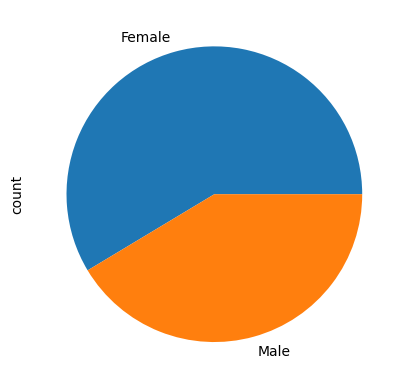

In [ ]:
# Removing the 'other' gender instance inorder to reduce the dimension
df['gender'] = df['gender'].replace('Other','Female')
# plotting a pie chart to see the gender count distribution
df['gender'].value_counts().plot(kind="pie")

<Axes: xlabel='stroke'>

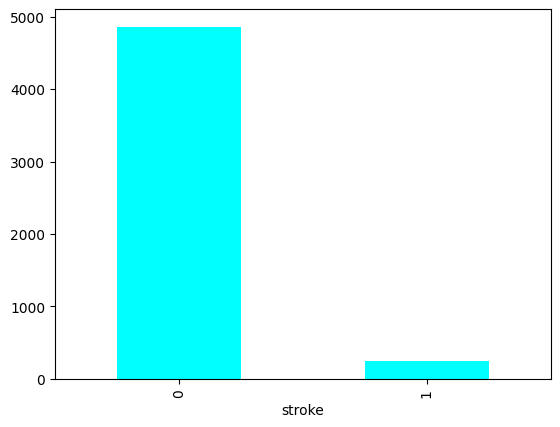

In [ ]:
# Graphical representation of the value count distribution of the target attribute
df['stroke'].value_counts().plot(kind="bar",color = "cyan")

In [ ]:
print("% of people who actualy got a stroke : ",(df['stroke'].value_counts()[1]/df['stroke'].value_counts().sum()).round(3)*100)

% of people who actualy got a stroke :  4.9


In [ ]:
# Finding the count of outliers based on those instances which are out of iqr
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
# Finding IQR
IQR = Q3 - Q1
da=(df['bmi'] < (Q1 - 1.5 * IQR)) | (df['bmi'] > (Q3 + 1.5 * IQR))
da.value_counts()

,count
bmi,
False,5000
True,110


In [ ]:
# Imputing the missing N/A values using the median of bmi column
print("median of bmi",df['bmi'].median())
df['bmi']=df['bmi'].fillna(df['bmi'].median())

median of bmi 28.1


In [ ]:
# Finding the count of outliers based on those instances which are out of iqr
Q1 = df['avg_glucose_level'].quantile(0.25)
Q3 = df['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1
da=(df['avg_glucose_level'] < (Q1 - 1.5 * IQR)) | (df['avg_glucose_level'] > (Q3 + 1.5 * IQR))
da.value_counts()

,count
avg_glucose_level,
False,4483
True,627


In [ ]:
# Converting numeric-binary value attributes to string
df[['hypertension', 'heart_disease', 'stroke']] = df[['hypertension', 'heart_disease', 'stroke']].astype(str)
# Generating dummy attributes - one hot encoding format
df = pd.get_dummies(df, drop_first= True)


In [ ]:
# The data frame after performing dummy attributes
df.head()

,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_1
0,67.0,228.69,36.6,True,False,True,True,False,True,False,False,True,True,False,False,True
1,61.0,202.21,28.1,False,False,False,True,False,False,True,False,False,False,True,False,True
2,80.0,105.92,32.5,True,False,True,True,False,True,False,False,False,False,True,False,True
3,49.0,171.23,34.4,False,False,False,True,False,True,False,False,True,False,False,True,True
4,79.0,174.12,24.0,False,True,False,True,False,False,True,False,False,False,True,False,True


In [ ]:
# Since our Dataset is highly undersampled (based on target instances) we are going to perform a over sampling method to have equal representation of both the target classes
# Using random oversampling - importing the library
from imblearn.over_sampling import RandomOverSampler

# Performing a minority oversampling
oversample = RandomOverSampler(sampling_strategy='minority')
X=df.drop(['stroke_1'],axis=1)
y=df['stroke_1']

# Obtaining the oversampled dataframes - testing and training
X_over, y_over = oversample.fit_resample(X, y)

In [ ]:
# importing a scaling modeule
from sklearn.preprocessing import StandardScaler

# Since the numeric attributes in the dataset is in different ranges and three are outliers persent we are usign a scaler to get all the values into the same range.
s = StandardScaler()
# Scaling the numeric attributes
df[['bmi', 'avg_glucose_level', 'age']] = s.fit_transform(df[['bmi', 'avg_glucose_level', 'age']])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# creating dataset split for training and testing the model
from sklearn.model_selection import train_test_split
# Performing a 80-20 test-train split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size= 0.20, random_state= 42)

In [ ]:
X_train

,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
5377,54.0,191.82,40.4,False,False,False,True,False,False,True,False,False,False,False,True
6692,77.0,90.00,32.0,False,False,False,True,False,False,True,False,False,False,True,False
4996,40.0,93.97,23.6,False,False,False,True,False,True,False,False,True,False,True,False
1561,62.0,123.95,34.8,True,True,True,True,False,True,False,False,True,True,False,False
2114,29.0,81.20,23.0,False,False,False,True,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,49.0,104.86,31.9,True,False,False,False,False,True,False,False,False,False,False,True
5191,32.0,76.13,29.9,False,False,False,True,False,True,False,False,False,False,False,True
5390,75.0,221.29,25.8,True,True,False,True,False,True,False,False,True,False,False,True
860,46.0,100.15,50.3,False,False,False,True,False,True,False,False,False,False,False,True


In [ ]:
# Checking the size of the splits
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (7777, 15)
y_train: (7777,)
X_test: (1945, 15)
y_test: (1945,)


ELM

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pandas as pd
import numpy as np

# Identify categorical columns in X_train
categorical_columns = X_train.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

# Use OneHotEncoder for categorical columns
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_columns]))
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_columns]))

# Drop original categorical columns and concatenate encoded ones
X_train_numeric = X_train.drop(categorical_columns, axis=1).reset_index(drop=True)
X_test_numeric = X_test.drop(categorical_columns, axis=1).reset_index(drop=True)
X_train_final = pd.concat([X_train_numeric, X_train_encoded], axis=1)
X_test_final = pd.concat([X_test_numeric, X_test_encoded], axis=1)

# Convert to numpy arrays
X_train_np = X_train_final.to_numpy().astype(float)
X_test_np = X_test_final.to_numpy().astype(float)

# Confirm all data is numerical
print("X_train_np type:", type(X_train_np), "dtype:", X_train_np.dtype)
print("X_test_np type:", type(X_test_np), "dtype:", X_test_np.dtype)


Categorical Columns: Index([], dtype='object')
X_train_np type: <class 'numpy.ndarray'> dtype: float64
X_test_np type: <class 'numpy.ndarray'> dtype: float64


In [ ]:
print(type(X_train_np), X_train_np.dtype)
print(type(X_test_np), X_test_np.dtype)

<class 'numpy.ndarray'> float64
<class 'numpy.ndarray'> float64


Accuracy: 0.9393346379647749

Confusion Matrix:
 [[960   0]
 [ 62   0]]


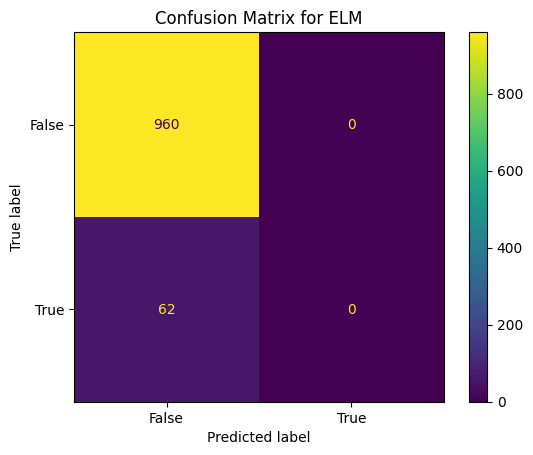

Classification Report:
               precision    recall  f1-score   support

       False       0.94      1.00      0.97       960
        True       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


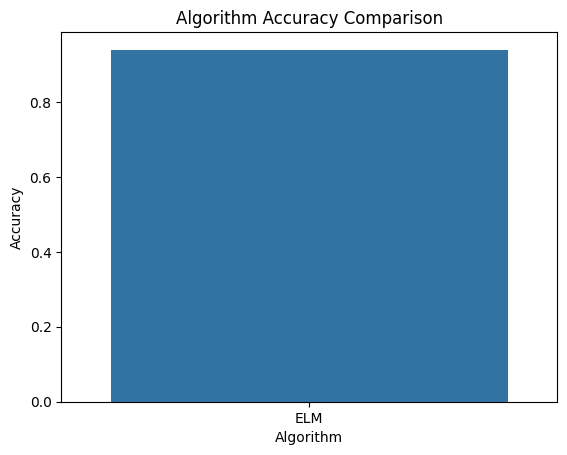

In [ ]:

from hpelm import ELM
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



# One-hot encode the labels
onehot_encoder = OneHotEncoder(sparse_output=False)
y_train_encoded = onehot_encoder.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_test_encoded = onehot_encoder.transform(y_test.to_numpy().reshape(-1, 1))

# Initialize the ELM model
elm = ELM(X_train_np.shape[1], y_train_encoded.shape[1])  # Input size and number of output classes
elm.add_neurons(100, 'sigm')  # Add 100 neurons with sigmoid activation

# Train the ELM model
elm.train(X_train_np, y_train_encoded, 'c')  # 'c' indicates classification mode

# Perform predictions on the test dataset
y_pred_probs = elm.predict(X_test_np)  # Probabilities for each class
y_pred = np.argmax(y_pred_probs, axis=1)  # Get the class with the highest probability

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate and print a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Display confusion matrix
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=onehot_encoder.categories_[0]).plot()
plt.title("Confusion Matrix for ELM")
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualize the model's accuracy
models = ['ELM']
acc = [accuracy]
sns.barplot(data=pd.DataFrame({"Algorithm": models, "Accuracy": acc}), x="Algorithm", y="Accuracy")
plt.title("Algorithm Accuracy Comparison")
plt.show()


In [ ]:
elm.save("elm_model.h5")  # Save the ELM model weights and architecture
print("Model saved as elm_model.h5")


Model saved as elm_model.h5


Random Forest

Accuracy: 0.8683804627249357

Classification Report:
               precision    recall  f1-score   support

       False       0.93      0.80      0.86       975
        True       0.82      0.94      0.88       970

    accuracy                           0.87      1945
   macro avg       0.88      0.87      0.87      1945
weighted avg       0.88      0.87      0.87      1945


Confusion Matrix:
 [[779 196]
 [ 60 910]]


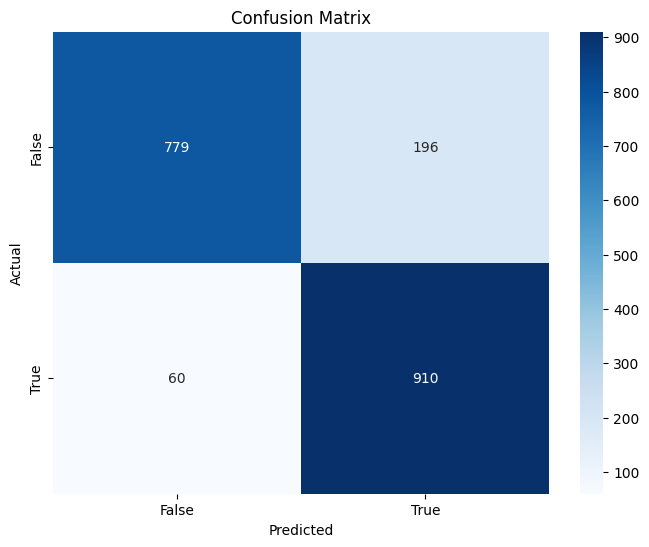

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Create the classifier object
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=8,random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
# Printing accuracy of the model
print('Accuracy:', accuracy_score(y_test, y_pred_rf))

# Printing classification report for precision, recall, and F1-score
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:\n", conf_matrix)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
# Making sample predictions based on manual value entry
age=75
avg_glucose_level=300
bmi=36.6
gender_Male=1
ever_married_Yes=1
work_type_Never_worked=0
work_type_Private=1
work_type_Self_employed=0
work_type_children=0
Residence_type_Urban=1
smoking_status_formerly_smoked=1
smoking_status_never_smoked=0
smoking_status_smokes=0
hypertension_1=1
heart_disease_1=1
input_features = [age	,avg_glucose_level,	bmi	,gender_Male,hypertension_1,	heart_disease_1,ever_married_Yes,	work_type_Never_worked,	work_type_Private,	work_type_Self_employed,	work_type_children	,Residence_type_Urban,	smoking_status_formerly_smoked,smoking_status_never_smoked	,smoking_status_smokes]

features_value = [np.array(input_features)]
features_name = ['age'	,'avg_glucose_level',	'bmi'	,'gender_Male'	,'hypertension_1',	'heart_disease_1','ever_married_Yes',	'work_type_Never_worked',	'work_type_Private',	'work_type_Self-employed',	'work_type_children'	,'Residence_type_Urban',	'smoking_status_formerly smoked','smoking_status_never smoked'	,'smoking_status_smokes']

df = pd.DataFrame(features_value, columns=features_name)
prediction = rf_clf.predict(df)[0]
print(prediction)


True


In [ ]:
# Making sample predictions based on manual value entry
age=70
avg_glucose_level=290
bmi=33.4
gender_Male=1
ever_married_Yes=1
work_type_Never_worked=0
work_type_Private=0
work_type_Self_employed=0
work_type_children=0
Residence_type_Urban=1
smoking_status_formerly_smoked=1
smoking_status_never_smoked=0
smoking_status_smokes=1
hypertension_1=1
heart_disease_1=1
input_features = [age	,avg_glucose_level,	bmi	,gender_Male,hypertension_1,	heart_disease_1,ever_married_Yes,	work_type_Never_worked,	work_type_Private,	work_type_Self_employed,	work_type_children	,Residence_type_Urban,	smoking_status_formerly_smoked,smoking_status_never_smoked	,smoking_status_smokes]

features_value = [np.array(input_features)]
features_name = ['age'	,'avg_glucose_level',	'bmi'	,'gender_Male'	,'hypertension_1',	'heart_disease_1','ever_married_Yes',	'work_type_Never_worked',	'work_type_Private',	'work_type_Self-employed',	'work_type_children'	,'Residence_type_Urban',	'smoking_status_formerly smoked','smoking_status_never smoked'	,'smoking_status_smokes']

df = pd.DataFrame(features_value, columns=features_name)
prediction = rf_clf.predict(df)[0]
print(prediction)


True


In [ ]:
# For the front end
import pickle

with open('modelelmnew.pickle','wb') as f:
  pickle.dump(rf_clf,f)